# KAIM Week 1 Challenge Task 2

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  ta


In [41]:
apple = '../data/raw/yfinance_data/AAPL_historical_data.csv'
amazon = '../data/raw/yfinance_data/AMZN_historical_data.csv'
google = '../data/raw/yfinance_data/GOOG_historical_data.csv'
meta = '../data/raw/yfinance_data/META_historical_data.csv'
microsoft = '../data/raw/yfinance_data/MSFT_historical_data.csv'
nividia = '../data/raw/yfinance_data/NVDA_historical_data.csv'
tesla = '../data/raw/yfinance_data/TSLA_historical_data.csv'

In [42]:
apple = pd.read_csv(apple)
amazon = pd.read_csv(amazon)
google = pd.read_csv(google)
meta = pd.read_csv(meta)
microsoft = pd.read_csv(microsoft)
nividia = pd.read_csv(nividia)
tesla = pd.read_csv(tesla)

In [43]:

print(amazon.info())
print(google.info())
print(meta.info())
print(microsoft.info())
print(nividia.info())
print(tesla.info())
print(apple.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-nul

In [44]:
data = amazon
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [45]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000
mean,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944
std,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000
25%,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000
50%,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000
75%,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09,0.0,20.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [47]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [48]:
data.duplicated().sum()

np.int64(0)

In [49]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [50]:
# Convert date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [51]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999921,0.999904,0.999805,0.999805,-0.297579,NaN,0.016639
High,0.999921,1.000000,0.999885,0.999908,0.999908,-0.296579,NaN,0.017159
Low,0.999904,0.999885,1.000000,0.999914,0.999914,-0.298666,NaN,0.016668
Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Adj Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Volume,-0.297579,-0.296579,-0.298666,-0.297628,-0.297628,1.000000,NaN,0.016065
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.016639,0.017159,0.016668,0.016564,0.016564,0.016065,NaN,1.000000


#### **Calculate Basic Technical Indicators**

### Relative Strength Index (RSI)
The **Relative Strength Index (RSI)** is a tool used in trading to measure how fast and strong a price is moving. It's like a speedometer for prices, showing whether something (like a stock) is being bought or sold too much.

- **How it works**: RSI looks at the recent price changes over a certain period, usually 14 days. It compares the average gains (when the price goes up) to the average losses (when the price goes down).

- **Reading RSI**: The RSI value ranges from 0 to 100. 
  - **Above 70**: The asset might be overbought, meaning it's been bought a lot and could be due for a price drop.
  - **Below 30**: The asset might be oversold, meaning it's been sold a lot and could be due for a price increase.

### Moving Average Convergence Divergence (MACD)
The **Moving Average Convergence Divergence (MACD)** is another tool traders use to understand the momentum of a price, or how strong a trend is. It helps traders see changes in the strength, direction, and duration of a trend.

- **How it works**: The MACD is based on two moving averages, which are like smoothed-out versions of the price:
  1. **Fast Moving Average (Shorter Period)**: Reacts quickly to recent price changes.
  2. **Slow Moving Average (Longer Period)**: Reacts more slowly to price changes.

  The MACD line is the difference between these two moving averages. There's also a **Signal Line**, which is a moving average of the MACD line itself.

- **Reading MACD**:
  - When the **MACD line crosses above the Signal Line**, it might be a good time to buy (bullish signal).
  - When the **MACD line crosses below the Signal Line**, it might be a good time to sell (bearish signal).
  - If the lines are far apart, it shows strong momentum; if they're close, it shows weak momentum.

In [52]:
# Calculate Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI (Relative Strength Index)
from ta.momentum import RSIIndicator
data['RSI'] = RSIIndicator(close=data['Close'], window=14).rsi()

# Calculate MACD (Moving Average Convergence Divergence)
from ta.trend import MACD
macd = MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()
data['MACD_signal'] = macd.macd_signal()
data['MACD_hist'] = macd.macd_diff()

# Check the first few rows with new columns
data.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
len(data['MACD'].unique())

6822

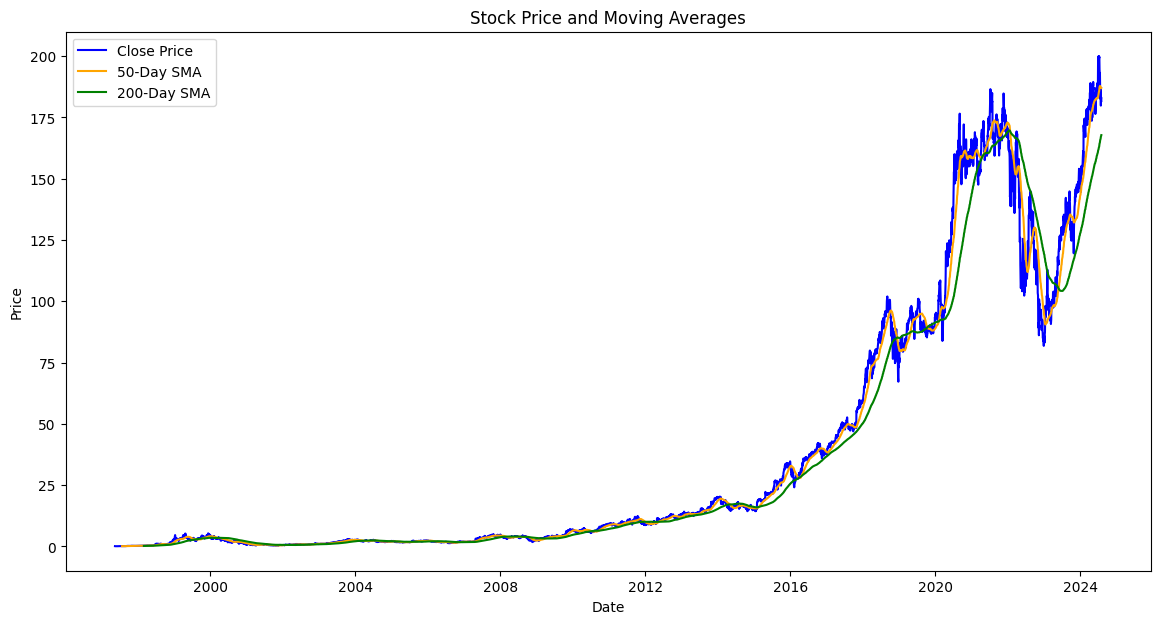

In [54]:
# Plot Closing Price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('Stock_price_moving_average.png')
plt.show()

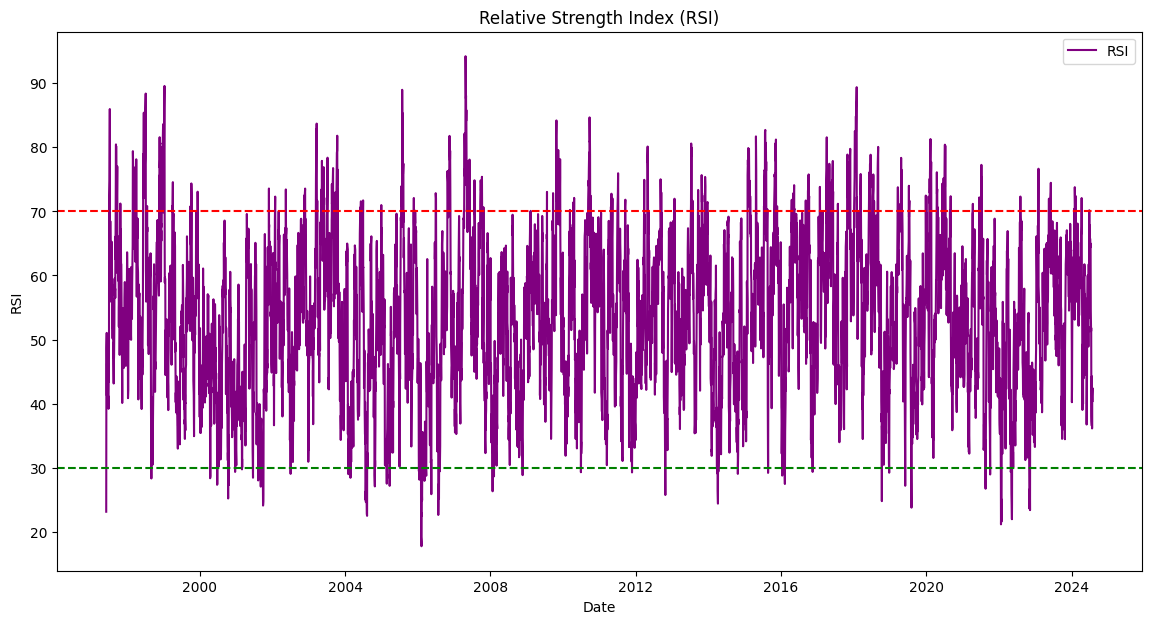

In [55]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.savefig('relative_strength_index.png')
plt.show()


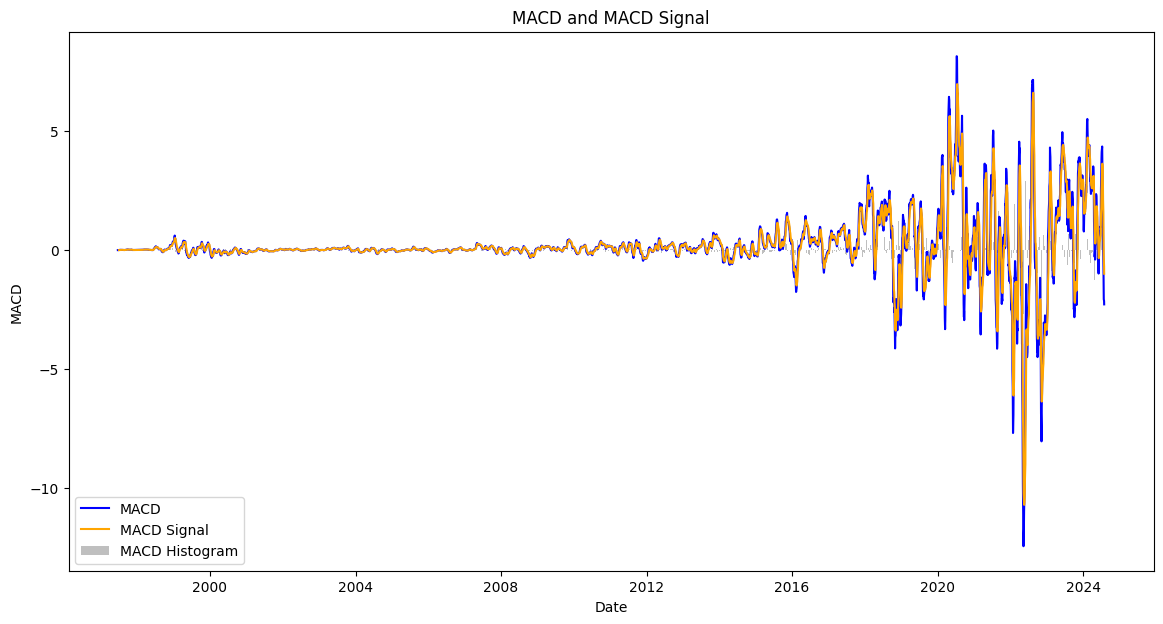

In [56]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD and MACD Signal')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.savefig('macd_signals.png')
plt.show()

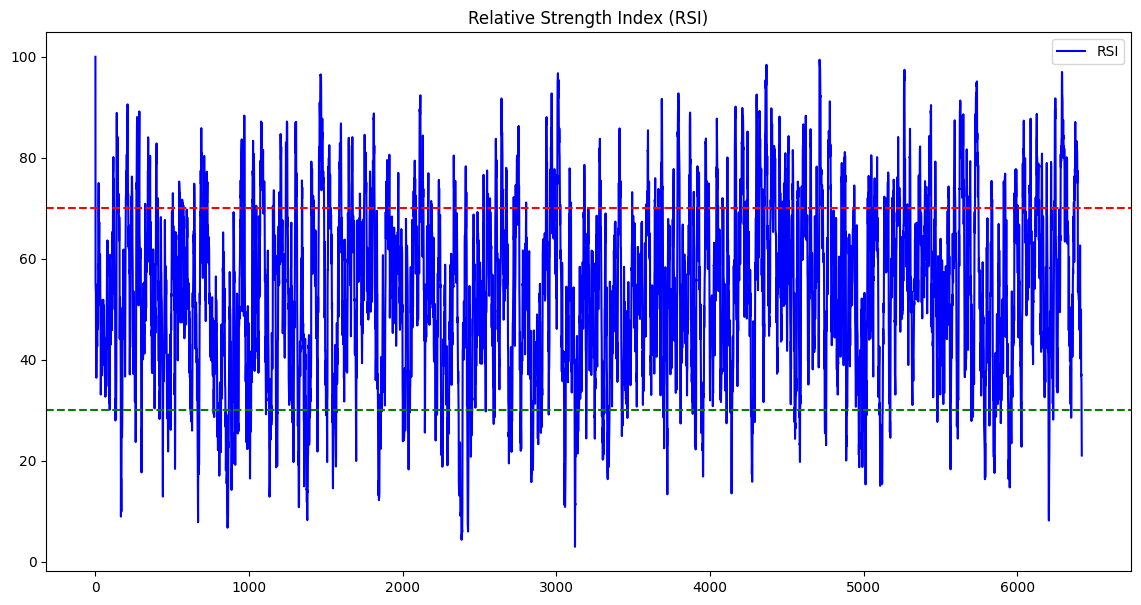

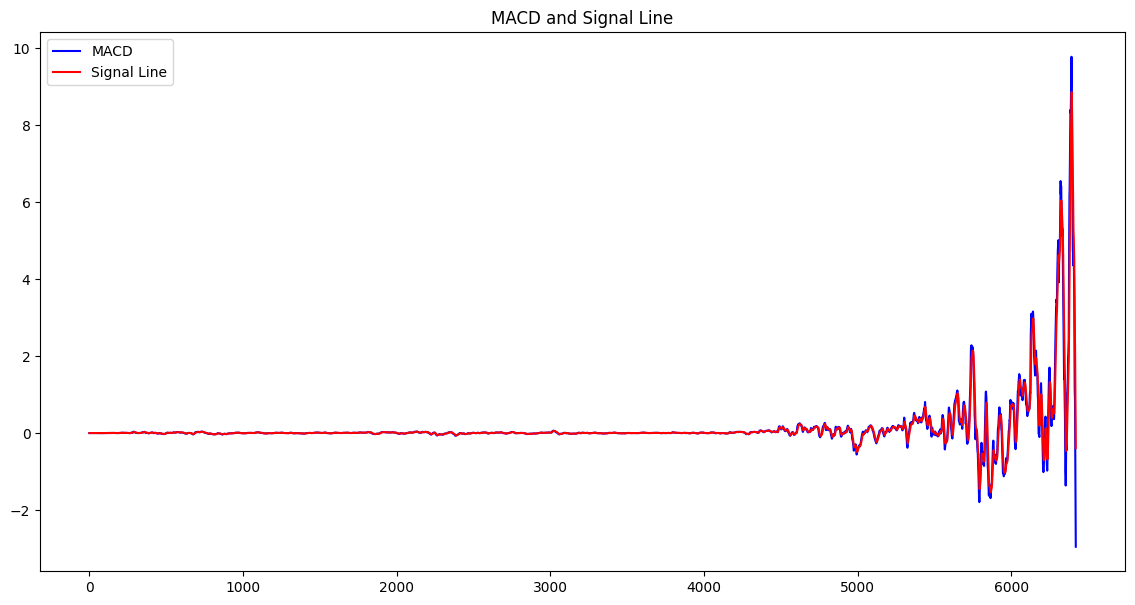

In [57]:
# Calculate RSI
def calculate_rsi(df, period=14):
    close = df['Close']
    delta = close.diff()

    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df['RSI'] = rsi
    return df

# Calculate MACD
def calculate_macd(df, short_period=12, long_period=26, signal_period=9):
    df['12_EMA'] = df['Close'].ewm(span=short_period, adjust=False).mean()
    df['26_EMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()

    df['MACD'] = df['12_EMA'] - df['26_EMA']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    
    return df

# Apply RSI and MACD functions
nividia = calculate_rsi(nividia)
nividia = calculate_macd(nividia)

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(nividia['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(nividia['MACD'], label='MACD', color='blue')
plt.plot(nividia['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()
